# Final Exam -  The battle of neighborhoods

## Part 1

### Introduction

I am currently living in Buenos Aires. I plan to move soon, I want to discover a new city that have a similar lifestyle than Buenos Aires. 

With the new way of working, from home, since Covid crisis, I believe that many people would like to discover new countries or city, but maybe they don't know where to go because there is few way to compare a city to another.


In this exercize I will try to build clusters of similar cities in order to help people to discover new place or know where to live. To do that they would be able to select a city of their choice and look at other similar cities, to take the best decision.

##### ---Problem to solve---

Find new places to live everywhere in the world, by comparing with a known city

##### ---Potential users---

Anyone who want to discover a new place to live and work. Potentially freelancers, and tech workers.


## Part 2

### Let's start getting the table of top cities and looking at the data

In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
url = 'https://www.infoplease.com/world/geography/major-cities-latitude-longitude-and-corresponding-time-zones'

In [3]:
world_data=pd.read_html(url)[0]

In [4]:
world_data.head()

Unnamed: 0_level_0           Latitude                Longitude        \
                     City Unnamed: 1_level_1     ' Unnamed: 3_level_1     '   
0      Aberdeen, Scotland                 57   9 N                  2   9 W   
1     Adelaide, Australia                 34  55 S                138  36 E   
2        Algiers, Algeria                 36  50 N                  3   0 E   
3  Amsterdam, Netherlands                 52  22 N                  4  53 E   
4          Ankara, Turkey                 39  55 N                 32  55 E   

  Unnamed: 5_level_0  
                Time  
0          5:00 p.m.  
1         2:30 a.m.1  
2          6:00 p.m.  
3          6:00 p.m.  
4          7:00 p.m.

In [5]:
#We clean columns name
world_data.columns=['City','Lat1','Lat2','Long1','Long2','Time']

In [6]:
world_data.head()

,City,Lat1,Lat2,Long1,Long2,Time
0,"Aberdeen, Scotland",57,9 N,2,9 W,5:00 p.m.
1,"Adelaide, Australia",34,55 S,138,36 E,2:30 a.m.1
2,"Algiers, Algeria",36,50 N,3,0 E,6:00 p.m.
3,"Amsterdam, Netherlands",52,22 N,4,53 E,6:00 p.m.
4,"Ankara, Turkey",39,55 N,32,55 E,7:00 p.m.


In [7]:
print('We will compare {} cities'.format(world_data.shape[0]))

We will compare 120 cities


### Summary of city dataset

The table is made of 120 cities. Latitude and longitude are not easily usable so we would use geocoders library to get coordinate of each cities.

### Now have a look to foorsquare data

In [8]:
# We prepare foorsquare credentials

CLIENT_ID = 'IHJKLCWBK3R5IC52KFSCWWVWG0TITKHLL5E1MLZMDSRFW4ED' # your Foursquare ID
CLIENT_SECRET = 'CVX13BLY545BNQXAG3F1I3KZC44ZQP0B1JGCC0GBEF1DOS34' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IHJKLCWBK3R5IC52KFSCWWVWG0TITKHLL5E1MLZMDSRFW4ED
CLIENT_SECRET:CVX13BLY545BNQXAG3F1I3KZC44ZQP0B1JGCC0GBEF1DOS34


In [9]:
# Let's look at te first city of our dataframe
# As we just want to analyse the data of foorsquare before cleaning cities table let's hardcode Aberdeen coordinate

In [10]:
from geopy.geocoders import Nominatim

In [11]:
address = 'Aberdeen, Scotland'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinate of Aberdeen, Scotland are 57.1482429, -2.0928095.


In [12]:
# Let's get the first 500 venues of this city
LIMIT = 500
radius = 5000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=IHJKLCWBK3R5IC52KFSCWWVWG0TITKHLL5E1MLZMDSRFW4ED&client_secret=CVX13BLY545BNQXAG3F1I3KZC44ZQP0B1JGCC0GBEF1DOS34&v=20180605&ll=57.1482429,-2.0928095&radius=5000&limit=500'

In [13]:
results=requests.get(url).json()

In [14]:
results

{'meta': {'code': 200, 'requestId': '60d46f9c0a93c65c3d7fc532'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Aberdeen',
  'headerFullLocation': 'Aberdeen',
  'headerLocationGranularity': 'city',
  'totalResults': 112,
  'suggestedBounds': {'ne': {'lat': 57.193242945000044,
    'lng': -2.0100099933919897},
   'sw': {'lat': 57.103242854999955, 'lng': -2.1756090066080103}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5669d04e498e6356a17d6440',
       'name': 'BrewDog Castlegate',
       'location': {'address': '5-9 Union St',
        'lat': 57.14773069623862,
        'lng': -2.094548465423609,
        'labeledLatLngs': [{'label': 'display',
          'lat': 57.14773069623862,


Foorsquare give us the list of venues of the selected cities. We would get this information for all main cities of the world. Then we would use this information to compare cities together and find cities most similar to Buenos Aires in term of registered activities.

### Summary of foorsquare data

Foorsquare let us get the data of different venues for each cities.
That would let us know the dynamic and lifestyle of each cites.

From foorsquare we can have

1. Neighborhood
2. Neighborhood Latitude
3. Neighborhood Longitude
4. Venue
5. Name of the venue e.g. the name of a store or restaurant
6. Venue Latitude
7. Venue Longitude
8. Venue Category

Metodology:
    
    1. We would get coordinate for each cities
    2. We would then use foorsquare to get list of top 500 venues for each cities
    3. We would use a non supervised machine learning approach to build clusters and determine similarity of each cities

## Part 3

### a - We prepare the city data set to get all coordinate and analyse City dataset

In [15]:
world_data=world_data[['City']]

In [16]:
world_data[['Latitude']]=""
world_data[['Longitude']]=""
world_data

,City,Latitude,Longitude
0,"Aberdeen, Scotland",,
1,"Adelaide, Australia",,
2,"Algiers, Algeria",,
3,"Amsterdam, Netherlands",,
4,"Ankara, Turkey",,
...,...,...,...
115,"Vienna, Austria",,
116,"Vladivostok, Russia",,
117,"Warsaw, Poland",,
118,"Wellington, New Zealand",,


In [17]:
for city in world_data['City']:

    geolocator = Nominatim(user_agent="world_explorer")
    location = geolocator.geocode(city)
    try:
        world_data['Latitude'][world_data['City']==city]=(location.latitude)
        world_data['Longitude'][world_data['City']==city]=(location.longitude)
    except:
        print('Geocoder cannot find coordinate for {}'.format(city))


Geocoder cannot find coordinate for Asuncin, Paraguay
Geocoder cannot find coordinate for Crdoba, Argentina
Geocoder cannot find coordinate for Mazatln, Mexico
Geocoder cannot find coordinate for Reykjavk, Iceland
Geocoder cannot find coordinate for Zrich, Switzerland


We have to handle some incorrect data, so let's clean it and get coordinate

In [18]:
world_data_to_clean = world_data[world_data['Latitude']==""]
world_data_to_clean

,City,Latitude,Longitude
5,"Asuncin, Paraguay",,
35,"Crdoba, Argentina",,
71,"Mazatln, Mexico",,
97,"Reykjavk, Iceland",,
119,"Zrich, Switzerland",,


In [19]:
world_data['City'][world_data['City']=='Asuncin, Paraguay']='Asuncion, Paraguay'
world_data['City'][world_data['City']=='Crdoba, Argentina']='Cordoba, Argentina'
world_data['City'][world_data['City']=='Mazatln, Mexico']='Mazatlan, Mexico'
world_data['City'][world_data['City']=='Reykjavk, Iceland']='Reykjavik, Iceland'
world_data['City'][world_data['City']=='Zrich, Switzerland']='Zurich, Switzerland'

In [20]:
world_data.head(6)

,City,Latitude,Longitude
0,"Aberdeen, Scotland",57.1482,-2.09281
1,"Adelaide, Australia",-34.9282,138.6
2,"Algiers, Algeria",28,2.99998
3,"Amsterdam, Netherlands",52.3728,4.8936
4,"Ankara, Turkey",39.9208,32.854
5,"Asuncion, Paraguay",,


In [21]:
for city in world_data['City'][world_data['Latitude']==""]:

    geolocator = Nominatim(user_agent="world_explorer")
    location = geolocator.geocode(city)
    try:
        print('{} coordinate are lat:{}, long:{}'.format(city, location.latitude, location.longitude))
        world_data['Latitude'][world_data['City']==city]=(location.latitude)
        world_data['Longitude'][world_data['City']==city]=(location.longitude)
    except:
        print('Geocoder cannot find coordinate for {}'.format(city))

Asuncion, Paraguay coordinate are lat:-25.2800459, long:-57.6343814
Cordoba, Argentina coordinate are lat:-31.4173391, long:-64.183319
Mazatlan, Mexico coordinate are lat:23.2313053, long:-106.4153144
Reykjavik, Iceland coordinate are lat:64.145981, long:-21.9422367
Zurich, Switzerland coordinate are lat:47.3744489, long:8.5410422


We now have our dataset complete with all coordinate. Let's visualize it on a map

In [22]:
import folium

In [23]:
# create map of Toronto using latitude and longitude values
map_world = folium.Map(zoom_start=10)

# add markers to map
for lat, lng, city in zip(world_data['Latitude'], world_data['Longitude'], world_data['City']):
    label = city
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_world) 
    
map_world

We notice that we have no cities of United States and Canada.

### b - Let's get the data from foursquare of 100 top venues for each of those cities

In [24]:
# Based on data of foursquare we first create a function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
#We create a function to get venues of all cities of a dataset 

LIMIT= 500

def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
# Now we will put all venues into a dataframe

world_cities_venues = getNearbyVenues(names = world_data['City'],
                                latitudes = world_data['Latitude'],
                                longitudes = world_data['Longitude'])

In [27]:
world_cities_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Aberdeen, Scotland",57.148243,-2.092809,BrewDog Castlegate,57.147731,-2.094548,Beer Bar
1,"Aberdeen, Scotland",57.148243,-2.092809,BrewDog Aberdeen,57.149520,-2.097525,Beer Bar
2,"Aberdeen, Scotland",57.148243,-2.092809,Six Degrees North,57.149971,-2.096750,Bar
3,"Aberdeen, Scotland",57.148243,-2.092809,CASC ABERDEEN,57.145874,-2.097568,Bar
4,"Aberdeen, Scotland",57.148243,-2.092809,Fierce Bar Aberdeen,57.147389,-2.094415,Beer Bar


In [28]:
world_cities_venues.shape

(9771, 7)

In [39]:
Overview = world_cities_venues.groupby('City').count()
Overview = Overview[['Venue']]
Overview

,Venue
City,
"Aberdeen, Scotland",100
"Adelaide, Australia",100
"Amsterdam, Netherlands",100
"Ankara, Turkey",100
"Asuncion, Paraguay",100
...,...
"Vienna, Austria",100
"Vladivostok, Russia",90
"Warsaw, Poland",100


In [30]:
import matplotlib

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc28828d00>]],
      dtype=object)

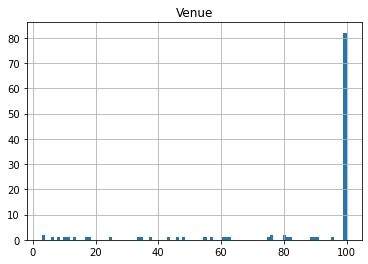

In [31]:
Overview.hist(bins=100)

We notice that some cities have less than 100 expected venues. We would use number of venues as a income parameters to build our segmentation.

In [32]:
#First let's create onehot dataframe
world_venues_onehot = pd.get_dummies(world_cities_venues[['Venue Category']], prefix="", prefix_sep="")

#Then let's add the city back to dataframe
world_venues = world_venues_onehot.merge(world_cities_venues[['City']], right_index=True, left_index=True)

#Finally sort the dataframe to get last columns first
fixed_columns= [world_venues.columns[-1]] + list(world_venues.columns[:-1])
world_venues_df = world_venues[fixed_columns]

In [33]:
world_venues_df.head()

,City,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,...,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,"Aberdeen, Scotland",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Aberdeen, Scotland",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Aberdeen, Scotland",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Aberdeen, Scotland",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Aberdeen, Scotland",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
world_venues_grouped = world_venues_df.groupby('City').mean().reset_index()

In [35]:
world_venues_grouped.head()

,City,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,...,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,"Aberdeen, Scotland",0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.00,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1,"Adelaide, Australia",0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.00,...,0.0,0.0,0.00,0.01,0.0,0.00,0.0,0.0,0.0,0.0
2,"Amsterdam, Netherlands",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.01,0.00,0.0,0.02,0.0,0.0,0.0,0.0
3,"Ankara, Turkey",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.01,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
4,"Asuncion, Paraguay",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.01,0.00,0.0,0.00,0.0,0.0,0.0,0.0


Let's get the top 10 popular venues by city in a dataframe

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['city']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['city'] = world_venues_grouped['City']

for ind in np.arange(world_venues_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(world_venues_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted.head(10)

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Aberdeen, Scotland",Beer Bar,Supermarket,Bar,Café,Coffee Shop,Gym / Fitness Center,Grocery Store,Electronics Store,Clothing Store,Restaurant
1,"Adelaide, Australia",Café,Coffee Shop,Thai Restaurant,Japanese Restaurant,Italian Restaurant,Hotel,Wine Bar,Cocktail Bar,Asian Restaurant,Pub
2,"Amsterdam, Netherlands",Hotel,Restaurant,Cocktail Bar,Bookstore,Coffee Shop,French Restaurant,Bar,Chocolate Shop,Sandwich Place,Bakery
3,"Ankara, Turkey",Café,Hotel,Turkish Restaurant,Dessert Shop,Dance Studio,Coffee Shop,Sandwich Place,Restaurant,Pub,Bookstore
4,"Asuncion, Paraguay",Bakery,Historic Site,Bar,Ice Cream Shop,Restaurant,Coffee Shop,Hotel,Fast Food Restaurant,Gym,Café
5,"Athens, Greece",Bar,Café,Coffee Shop,Ice Cream Shop,Hotel,Dessert Shop,Greek Restaurant,Bookstore,Cocktail Bar,Historic Site
6,"Auckland, New Zealand",Café,Japanese Restaurant,Gym,Coffee Shop,Restaurant,Park,Bakery,Bagel Shop,Hotel,Pizza Place
7,"Bangkok, Thailand",Thai Restaurant,Hotel,Massage Studio,Café,Coffee Shop,Noodle House,Palace,Bakery,History Museum,Asian Restaurant
8,"Barcelona, Spain",Hotel,Tapas Restaurant,Spanish Restaurant,Ice Cream Shop,Bookstore,Wine Bar,Coffee Shop,Cocktail Bar,Mediterranean Restaurant,Italian Restaurant
9,"Beijing, China",Hotel,Historic Site,Coffee Shop,Fast Food Restaurant,Peking Duck Restaurant,Chinese Restaurant,Café,Park,Plaza,History Museum


As we saw all cities didn't have the same quantity of venues we will add venues to the dataframe.

In [49]:
venues_df= pd.merge(world_venues_grouped, Overview, left_on='City', right_index=True)

We now have a dataset with all our cities and top venues of all those cities. Let's build clusters to identify what cities are the most similar in term of lifestyle.

### c- Creation of our clusters

In [46]:
from sklearn.cluster import KMeans

In [119]:
# set number of clusters
kclusters = 5

world_cities_clustering = venues_df.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(world_cities_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [120]:
clusters=pd.DataFrame(kmeans.labels_, columns=['cluster label'])

In [121]:
# We now add the data to our dataframe of top ten venues per cities

labbeled_df = pd.merge(cities_venues_sorted, clusters, right_index=True, left_index=True)
labbeled_df.head()

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,cluster label
0,"Aberdeen, Scotland",Beer Bar,Supermarket,Bar,Café,Coffee Shop,Gym / Fitness Center,Grocery Store,Electronics Store,Clothing Store,Restaurant,1
1,"Adelaide, Australia",Café,Coffee Shop,Thai Restaurant,Japanese Restaurant,Italian Restaurant,Hotel,Wine Bar,Cocktail Bar,Asian Restaurant,Pub,1
2,"Amsterdam, Netherlands",Hotel,Restaurant,Cocktail Bar,Bookstore,Coffee Shop,French Restaurant,Bar,Chocolate Shop,Sandwich Place,Bakery,1
3,"Ankara, Turkey",Café,Hotel,Turkish Restaurant,Dessert Shop,Dance Studio,Coffee Shop,Sandwich Place,Restaurant,Pub,Bookstore,1
4,"Asuncion, Paraguay",Bakery,Historic Site,Bar,Ice Cream Shop,Restaurant,Coffee Shop,Hotel,Fast Food Restaurant,Gym,Café,1


In [122]:
labbeled_df.groupby('cluster label').count()

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
cluster label,,,,,,,,,,,
0,5,5,5,5,5,5,5,5,5,5,5
1,84,84,84,84,84,84,84,84,84,84,84
2,10,10,10,10,10,10,10,10,10,10,10
3,9,9,9,9,9,9,9,9,9,9,9
4,6,6,6,6,6,6,6,6,6,6,6


In [123]:
# We add list of top venues to DF

labbeled_df = pd.merge(labbeled_df, world_data, how='left', right_on='City', left_on='city')

In [124]:
labbeled_df.drop(['City'], axis=1, inplace=True)

In [125]:
labbeled_df.head()

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,cluster label,Latitude,Longitude
0,"Aberdeen, Scotland",Beer Bar,Supermarket,Bar,Café,Coffee Shop,Gym / Fitness Center,Grocery Store,Electronics Store,Clothing Store,Restaurant,1,57.1482,-2.09281
1,"Adelaide, Australia",Café,Coffee Shop,Thai Restaurant,Japanese Restaurant,Italian Restaurant,Hotel,Wine Bar,Cocktail Bar,Asian Restaurant,Pub,1,-34.9282,138.6
2,"Amsterdam, Netherlands",Hotel,Restaurant,Cocktail Bar,Bookstore,Coffee Shop,French Restaurant,Bar,Chocolate Shop,Sandwich Place,Bakery,1,52.3728,4.8936
3,"Ankara, Turkey",Café,Hotel,Turkish Restaurant,Dessert Shop,Dance Studio,Coffee Shop,Sandwich Place,Restaurant,Pub,Bookstore,1,39.9208,32.854
4,"Asuncion, Paraguay",Bakery,Historic Site,Bar,Ice Cream Shop,Restaurant,Coffee Shop,Hotel,Fast Food Restaurant,Gym,Café,1,-25.28,-57.6344


### d- Data visualization

In [126]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [127]:
# create map
map_clusters = folium.Map(zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(labbeled_df['Latitude'], labbeled_df['Longitude'], labbeled_df['city'], labbeled_df['cluster label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### d) Understanding the result

As we see on the results most of the main cities of the world look like really similar in term of lifestyles.
We will now try to understand what are the most popular venues in each clusters in order to describe them

In [128]:
world_analisis = pd.merge(world_venues_grouped, labbeled_df[['city','cluster label']], how='left', left_on='City', right_on='city')

In [129]:
world_analisis.head()

,City,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,...,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo,city,cluster label
0,"Aberdeen, Scotland",0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.00,...,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,"Aberdeen, Scotland",1
1,"Adelaide, Australia",0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.00,...,0.00,0.01,0.0,0.00,0.0,0.0,0.0,0.0,"Adelaide, Australia",1
2,"Amsterdam, Netherlands",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.01,0.00,0.0,0.02,0.0,0.0,0.0,0.0,"Amsterdam, Netherlands",1
3,"Ankara, Turkey",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.01,...,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,"Ankara, Turkey",1
4,"Asuncion, Paraguay",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.01,0.00,0.0,0.00,0.0,0.0,0.0,0.0,"Asuncion, Paraguay",1


In [133]:
#Let's see how many city do we have in each clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc11203e50>]],
      dtype=object)

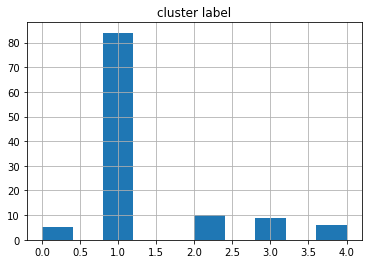

In [134]:
world_analisis.hist('cluster label')

In [130]:
# Let's look at most popular venues in each clusters
world_analisis_grouped=world_analisis.groupby('cluster label').mean().reset_index()

In [131]:
world_analisis_grouped.head()

,cluster label,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,...,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.000238,0.000000,0.000714,0.000119,0.000119,0.000952,0.002500,0.000238,0.000357,...,0.000476,0.000357,0.000952,0.000119,0.000476,0.002143,0.000476,0.000357,0.000119,0.000119
2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,0.000000,0.001372,0.000000,0.000000,0.000000,0.005488,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001372,0.000000,0.000000,0.001462,0.000000,0.000000,0.000000,0.001481
4,4,0.003623,0.000000,0.000000,0.000000,0.000000,0.009804,0.004902,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003876,0.000000,0.000000,0.000000


In [132]:
num_top_venues = 5

for cluster in world_analisis_grouped['cluster label']:
    print("---Cluster n°{}---".format(cluster))
    temp = world_analisis_grouped[world_analisis_grouped['cluster label'] == cluster].T.reset_index() #We transpose the information
    temp.columns = ['venue','freq'] #We add title to the serie
    temp = temp.iloc[1:] #We delete first row which contain Neighborhood name
    temp['freq'] = temp['freq'].astype(float) #We convert number to float
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---Cluster n°0---
                  venue  freq
0                 Hotel  0.07
1           Coffee Shop  0.06
2      Cuban Restaurant  0.05
3  Fast Food Restaurant  0.04
4            Taco Place  0.03


---Cluster n°1---
         venue  freq
0        Hotel  0.05
1  Coffee Shop  0.05
2         Café  0.05
3          Bar  0.03
4   Restaurant  0.03


---Cluster n°2---
                  venue  freq
0                 Hotel  0.08
1     Mobile Phone Shop  0.08
2         Grocery Store  0.05
3         Shopping Mall  0.04
4  Fast Food Restaurant  0.04


---Cluster n°3---
                  venue  freq
0                 Hotel  0.11
1  Fast Food Restaurant  0.08
2                  Café  0.07
3           Coffee Shop  0.05
4           Pizza Place  0.03


---Cluster n°4---
                  venue  freq
0                  Café  0.10
1                 Hotel  0.09
2            Restaurant  0.05
3    Italian Restaurant  0.04
4  Fast Food Restaurant  0.03




### e) Conclusion

As we could imagine biggest cities of the world are really similar in term of most popular venues.

In all of the clusters hotel is one of the most common venues. It seems logical as all of those cities are economic centers where hotel can be used for tourism and for business purpose. 
To have a better differenciation we could try to clean the DF and exclude hotel as it's doesn't mean a lot in term of lifestyle.

The bigest cluster is the cluster 1. Top 5 most comon venues are all related to dynamic and cultural places where most comon places are Bar, Café and Restaurant and you would probably find high gastronomy diversity, and probably a good nightlife, with popularity of Bars.

In an other hand other and smallest clusters seems to have less diversity in term of restaurant, we only see classic fast food places, as pizza, mexican or other fast food. This is the case of clusters 0,3 and 4.

Finally the most different cluster is the cluster 2, with apparently less cultural activities. Main venues are shoppings, and most popular restaurants are fast food. We can imagine big economic cities, not developped at all for any tourism or chill activities.



#### Place for improvement

We could have add some aditional information as number of inhabitant per city, rain and sun statistics, air contamination etc, to have a better clustering of each cities.

Also we notice that we have no cities of Canada and United States. We can consider that our dataset is a bit short to have a real mapping of world main cities
